# Final Project

**Due December 7th, 2022 (Wednesday)**

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 

In [1]:
#My Final Proj Start Here

In [2]:
#Import the Lib
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [3]:
covid_us = read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv', col_types=cols())
covid_us |> tail(1)

date,cases,deaths
<date>,<dbl>,<dbl>
2022-11-09,97654808,1069792


Until yesterday, 

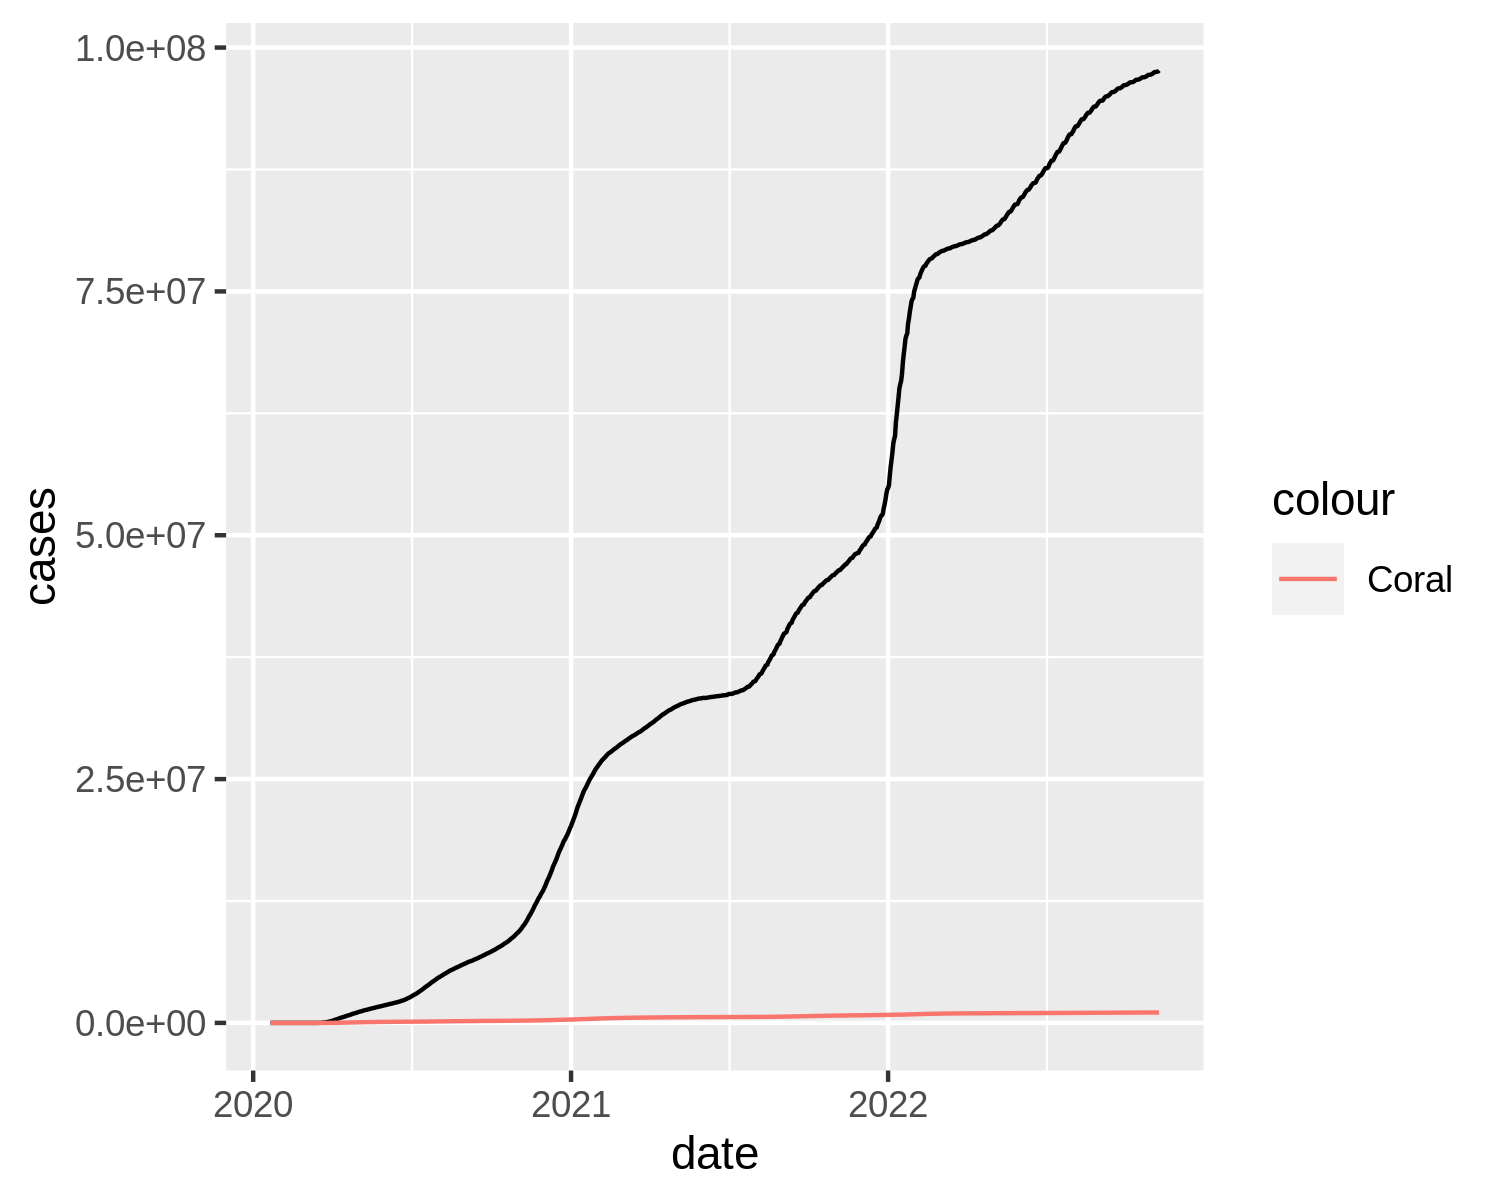

In [4]:
#Should have a line plot for both cases and deaths here
p = ggplot(covid_us, aes(x=date, y=cases)) + geom_line() + geom_line(aes(x=date, y=deaths, color = 'Coral'))
p
#may use something like SAS transpose

In [5]:
covid_st = read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv', col_types=cols())
covid_st |> tail(4)

date,state,fips,cases,deaths
<date>,<chr>,<chr>,<dbl>,<dbl>
2022-11-09,Washington,53,1844137,14685
2022-11-09,West Virginia,54,610432,7538
2022-11-09,Wisconsin,55,1907238,15511
2022-11-09,Wyoming,56,179366,1917


In [6]:
#Should have a y-bar chart by state here
covid_st_yt = covid_st |> 
            group_by(state) |> 
            summarize(cases_now = max(cases), deaths_now = max(deaths)) |>
            ungroup()
covid_st_yt |> head()

state,cases_now,deaths_now
<chr>,<dbl>,<dbl>
Alabama,1534287,20558
Alaska,306812,1369
American Samoa,8257,34
Arizona,2300375,31613
Arkansas,962764,12523
California,11392945,97077


In [8]:
#Refer to 11_00_forcats_practices
covid_st_yt_sorted_c = covid_st_yt |> 
    arrange(desc(cases_now))
p = ggplot(covid_st_yt_sorted_c, aes(x = state, y = cases_now)) + geom_bar()
p

ERROR while rich displaying an object: Error in `geom_bar()`:
! Problem while computing stat.
ℹ Error occurred in the 1st layer.
Caused by error in `setup_params()`:
! `stat_count()` must only have an x or y aesthetic.

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(r